## GE Stock prices prediction (predict the 21st stock price using a lazy window of size 20)
## Historical data of 5 years was downloaded from Yahoo Finance


## https://finance.yahoo.com/quote/GE/history?period1=1552798472&period2=1710651260
## has Date,Open, High, Low, Close, Adj Close and Volume
## only considering Open, High, Low, Close


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import tensorflow as tf
import pandas as pd

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
data=data=pd.read_csv('/content/drive/MyDrive/GE19to24.csv')

datamatrix=data.to_numpy()

print(datamatrix.shape)

print(datamatrix)

(1259, 7)
[['2019-03-18' 62.38876 64.387199 ... 63.700233 62.534439 14675056]
 ['2019-03-19' 63.825138 64.574554 ... 63.637783 62.473125 8755779]
 ['2019-03-20' 63.263077 64.5121 ... 63.825138 62.657059 7745246]
 ...
 ['2024-03-13' 165.509995 171.050003 ... 170.160004 170.160004 6754100]
 ['2024-03-14' 170.25 170.75 ... 166.75 166.75 7550500]
 ['2024-03-15' 165.649994 170.5 ... 168.889999 168.889999 10584700]]


In [18]:
x=datamatrix[:,1:5]
print(x)
print(x.shape)

[[62.38876 64.387199 62.263855 63.700233]
 [63.825138 64.574554 63.325527 63.637783]
 [63.263077 64.5121 63.200626 63.825138]
 ...
 [165.509995 171.050003 165.509995 170.160004]
 [170.25 170.75 165.630005 166.75]
 [165.649994 170.5 164.889999 168.889999]]
(1259, 4)


In [19]:
N=1259*4
w=20
print(N)
x=np.reshape(x,N,)
m=int(np.floor(N/w))
print(m)
print(m*w)

5036
251
5020


In [20]:
N=w*m
x = np.asarray(x).astype('float32')
xt=x[0:N+1]
print(xt.shape)
x=x[0:N]
print(x.shape)

(5021,)
(5020,)


 Important: (batch_size or number of sample, timesteps or window size, features)

In [21]:
len(x[:])

5020

In [22]:
# zind=np.arange(0,N,20)
zind=np.arange(20,N+1,20)
print(zind.shape)

(251,)


In [23]:
zind

array([  20,   40,   60,   80,  100,  120,  140,  160,  180,  200,  220,
        240,  260,  280,  300,  320,  340,  360,  380,  400,  420,  440,
        460,  480,  500,  520,  540,  560,  580,  600,  620,  640,  660,
        680,  700,  720,  740,  760,  780,  800,  820,  840,  860,  880,
        900,  920,  940,  960,  980, 1000, 1020, 1040, 1060, 1080, 1100,
       1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320,
       1340, 1360, 1380, 1400, 1420, 1440, 1460, 1480, 1500, 1520, 1540,
       1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760,
       1780, 1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980,
       2000, 2020, 2040, 2060, 2080, 2100, 2120, 2140, 2160, 2180, 2200,
       2220, 2240, 2260, 2280, 2300, 2320, 2340, 2360, 2380, 2400, 2420,
       2440, 2460, 2480, 2500, 2520, 2540, 2560, 2580, 2600, 2620, 2640,
       2660, 2680, 2700, 2720, 2740, 2760, 2780, 2800, 2820, 2840, 2860,
       2880, 2900, 2920, 2940, 2960, 2980, 3000, 30

In [24]:
# zind=np.arange(20,N+1,20)
# print(zind.shape)
z=xt[zind]
print(z.shape)


(251,)


In [25]:
x=np.reshape(x,(m,w,1))
print(x.shape)

(251, 20, 1)


In [26]:
# x

In [27]:
# x[0,:,:]
# len(x[0])

In [28]:
len(z)

251

In [29]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest,ztrain,ztest = train_test_split(x,z, test_size=0.25, random_state=25)

print(f"No. of training examples: {Xtrain.shape[0]}")
print(f"No. of testing examples: {Xtest.shape[0]}")

No. of training examples: 188
No. of testing examples: 63


In [30]:
# xtrain=x[0:186]
# xtest=x[186:252]
# ztrain=z[0:186]
# ztest=z[186:252]

In [31]:
model = Sequential()
model.add(LSTM(250, input_shape=(20,1), activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [32]:
model.fit(Xtrain, ztrain, epochs=60, batch_size=1, verbose=2)

Epoch 1/60
188/188 - 6s - loss: 530.7551 - 6s/epoch - 32ms/step
Epoch 2/60
188/188 - 3s - loss: 247.1535 - 3s/epoch - 17ms/step
Epoch 3/60
188/188 - 3s - loss: 12.5476 - 3s/epoch - 17ms/step
Epoch 4/60
188/188 - 3s - loss: 14.0912 - 3s/epoch - 17ms/step
Epoch 5/60
188/188 - 5s - loss: 12.9509 - 5s/epoch - 24ms/step
Epoch 6/60
188/188 - 3s - loss: 14.2883 - 3s/epoch - 18ms/step
Epoch 7/60
188/188 - 3s - loss: 12.2963 - 3s/epoch - 18ms/step
Epoch 8/60
188/188 - 4s - loss: 16.3657 - 4s/epoch - 20ms/step
Epoch 9/60
188/188 - 4s - loss: 15.9755 - 4s/epoch - 23ms/step
Epoch 10/60
188/188 - 3s - loss: 15.6226 - 3s/epoch - 17ms/step
Epoch 11/60
188/188 - 3s - loss: 14.5906 - 3s/epoch - 18ms/step
Epoch 12/60
188/188 - 4s - loss: 11.5944 - 4s/epoch - 23ms/step
Epoch 13/60
188/188 - 4s - loss: 14.6317 - 4s/epoch - 20ms/step
Epoch 14/60
188/188 - 3s - loss: 12.3556 - 3s/epoch - 17ms/step
Epoch 15/60
188/188 - 3s - loss: 13.6824 - 3s/epoch - 18ms/step
Epoch 16/60
188/188 - 5s - loss: 13.4635 - 5s/e

In [33]:
Xpredicted=model.predict(Xtest)

2/2 [==============================] - 0s 20ms/step


In [34]:
len(Xpredicted),len(ztest)

(63, 63)

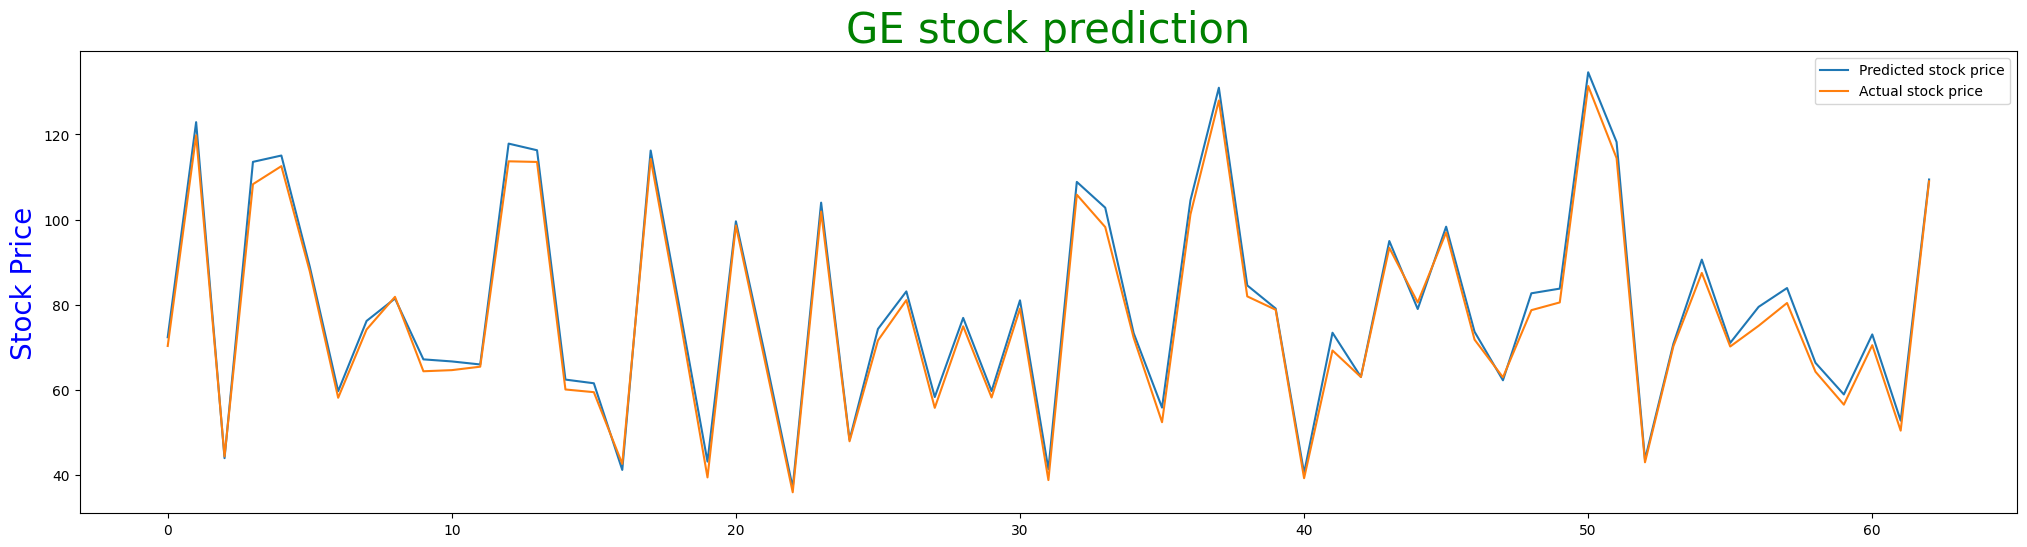

In [38]:
plt.figure(figsize=(25, 6), dpi=100)
plt.plot(Xpredicted,label='Predicted stock price')
plt.plot(ztest,label='Actual stock price')
plt.legend()
plt.title(label="GE stock prediction", fontsize=30, color="green")
plt.ylabel("Stock Price", fontsize=20, color="blue")
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('mean_absolute_error=',mean_absolute_error(Xpredicted,ztest))
print('Root mean squared error=',(np.sqrt(mean_squared_error(Xpredicted,ztest))))
print('The average difference between the stock price predicted by the model and the actual stock price is',round(np.sqrt(mean_squared_error(Xpredicted,ztest)),2))

mean_absolute_error= 2.1646636
Root mean squared error= 2.4726422
The average difference between the stock price predicted by the model and the actual stock price is 2.47
